# **Name : Bhavin Bhatt**
# **Title: Deciphering Cinematic Evolution**
## **A brief anlysis of 30 years of Cinematic Excellence.**

<center><a><img src="https://miro.medium.com/v2/resize:fit:1280/1*pox3X8OpqCMTYifPs30RMA.jpeg"/></a></center>

## **1) Objectives of the proposed research:**
## The Objective of the proposed research is to do a comprehensive analysis of the movie data for the last 30years using various data indicators such as the year of release, Director , Writer, country of origin, gross revenue, company and runtime of a movie. Our goal is to provide insights from analysis of the datasets.

## We will visualise the data across various categories such as which movie earned the most grossed revenue across regions. We will also analyse which Director and writer combination was most successful. Then we will analyse which production houses had the most success ratio.

## By analysing and visualising the data points we will come up with a recommendation for Steven Spielberg to help him with an informed decision making of producing a movie for the Summer. The recommendation would include the genre, writer, director and various other factors to ease out his decision making process with the help of data analysis.*italicized text*

## **2) Data Exploration:**

In [1]:
#Importing the dataset
import pandas as pd
import numpy as np
df_original = pd.read_csv("/content/movies.csv")
df_original.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


* We will only take the data for last 30 years as per our requirement.

In [2]:
# Taking data from 19886-2016
df = df_original[df_original['year'] >= 1991]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
1843,Terminator 2: Judgment Day,R,Action,1991,"July 3, 1991 (United States)",8.5,1000000.0,James Cameron,James Cameron,Arnold Schwarzenegger,United States,102000000.0,520881154.0,Carolco Pictures,137.0
1844,Point Break,R,Action,1991,"July 12, 1991 (United States)",7.3,166000.0,Kathryn Bigelow,Rick King,Patrick Swayze,United States,24000000.0,83531958.0,Largo Entertainment,122.0
1845,The Silence of the Lambs,R,Crime,1991,"February 14, 1991 (United States)",8.6,1300000.0,Jonathan Demme,Thomas Harris,Jodie Foster,United States,19000000.0,272742922.0,Strong Heart/Demme Production,118.0
1846,Hook,PG,Adventure,1991,"December 11, 1991 (United States)",6.8,240000.0,Steven Spielberg,J.M. Barrie,Dustin Hoffman,United States,70000000.0,300854823.0,Amblin Entertainment,142.0
1847,Boyz n the Hood,R,Crime,1991,"July 12, 1991 (United States)",7.8,130000.0,John Singleton,John Singleton,Cuba Gooding Jr.,United States,6500000.0,57529070.0,Columbia Pictures,112.0


* Checking the dataset again

In [3]:
df['year'].unique()

#counting years
print('The number of years of data now')

len(df['year'].unique())



The number of years of data now


30

In [4]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 5825
Number of columns: 15


* Our dataset consists of 5825 rows and 15 columns.

In [5]:
#Checking null values
df.isnull().sum()

name           0
rating        60
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         2
star           0
country        3
budget      1369
gross         58
company        7
runtime        4
dtype: int64

In [6]:
#Checking null values
df.isnull().sum().sum()

1511

There are total 1511 number of rows with null dataset which constitute about 25% of our dataset out of which 24% of total data has budget as missing value. We will remove budget column from our analysis and process further with removing other rows with null values since ratings, writer, country and gross cannot be replaced by either mode or mean as they are unique to each movies.

In [7]:
# Removing the Budget column
df = df.drop('budget', axis=1)

In [8]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'gross', 'company', 'runtime'],
      dtype='object')

In [9]:
# Removing null values

df= df.dropna()

#counting null values now

df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
gross       0
company     0
runtime     0
dtype: int64

In [10]:
#Dataframe shape
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 5718
Number of columns: 14


* We have successfully removed the null values.

In [11]:
#Getting the column types of the dataframe
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
gross       float64
company      object
runtime     float64
dtype: object

* The column types score, votes, gross are numerical values and their datatypes are correct whereas the column types of other categorical data is object which is correct.

## Column Names and their explanation
* name: The name of the movie
* rating: Rating explain the rating received by the movie out of 10.
* Genres: The categories or genres associated with the movie such as crime,  thriller, comedy, action, etc.
* year: The year of the release of the movie
* released : The release date of the movie consisting of date, year and place of release.
* score : The score of the movie out of 10.
* votes: The total number of votes received by the movie.
* director: Director of the movie.
* writer: Writer of the movie.
* star: Star cast of the movie.
* country: The country of production of the movie.
* gross: The gross revenue earned by the movie.This is not a profit but total revenue earned without deducting the costs and commissions of distributors, theatre owners and taxes.

* company: Production company which produced the movie.
* runtime: Total running time of the movie in minutes.


In [12]:
df.describe()

,year,score,votes,gross,runtime
count,5718.000000,5718.000000,5.718000e+03,5.718000e+03,5718.000000
mean,2005.057363,6.439944,1.070856e+05,9.478220e+07,108.429171
std,8.349724,0.958283,1.776280e+05,1.837382e+08,18.805425
min,1991.000000,1.900000,1.220000e+02,3.090000e+02,63.000000
25%,1998.000000,5.900000,1.700000e+04,6.195614e+06,96.000000
50%,2005.000000,6.500000,4.700000e+04,2.864618e+07,105.000000
75%,2012.000000,7.100000,1.170000e+05,1.006419e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,2.847246e+09,366.000000


* As per the summary statistics of the data we observed following points:
* Score - The average score data is 6.44.= with standadard deviation 0.95.
* Votes - The average number of votes across movies is 1,07,80,0000.
* Gross - The average gross revenue across movies is around 9,47,82 x e5.
* runtime - The average runtime across movies is around 108.4 minutes with minimum being 63mins and max being 366 minutes.

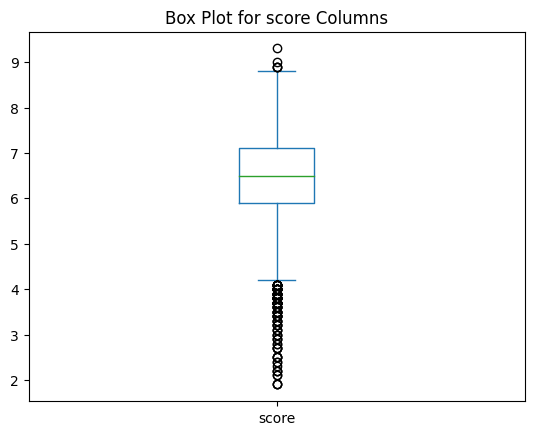

Text(0.5, 1.0, 'Box Plot for runtime Columns')

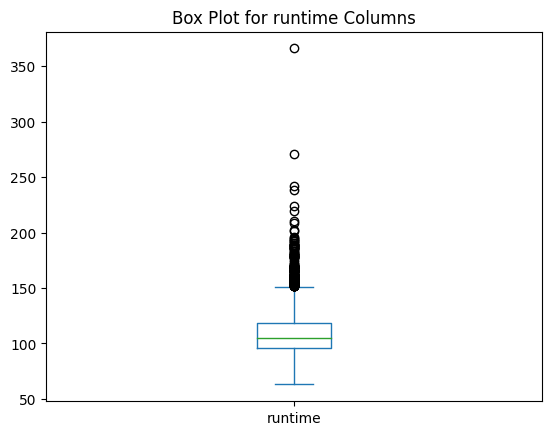

In [13]:
import matplotlib.pyplot as plt
df['score'].plot(kind='box')
plt.title('Box Plot for score Columns')
plt.show()


df['runtime'].plot(kind='box')
plt.title('Box Plot for runtime Columns')


Text(0.5, 1.0, 'Box Plot for votes Columns')

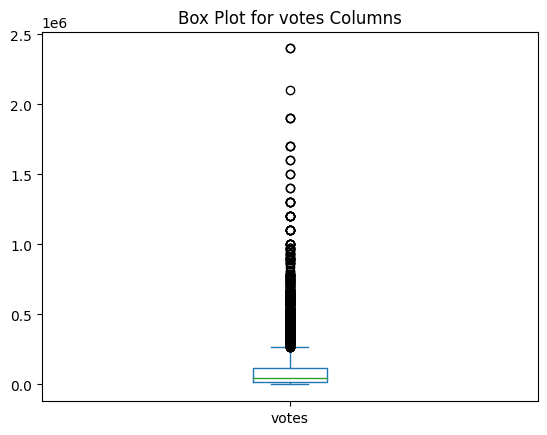

In [14]:
df['votes'].plot(kind='box')
plt.title('Box Plot for votes Columns')

* The box plots above show the distribution of votes, score and runtime across various categories with votes having most number of outliers.

In [15]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,gross,company,runtime
1843,Terminator 2: Judgment Day,R,Action,1991,"July 3, 1991 (United States)",8.5,1000000.0,James Cameron,James Cameron,Arnold Schwarzenegger,United States,520881154.0,Carolco Pictures,137.0
1844,Point Break,R,Action,1991,"July 12, 1991 (United States)",7.3,166000.0,Kathryn Bigelow,Rick King,Patrick Swayze,United States,83531958.0,Largo Entertainment,122.0
1845,The Silence of the Lambs,R,Crime,1991,"February 14, 1991 (United States)",8.6,1300000.0,Jonathan Demme,Thomas Harris,Jodie Foster,United States,272742922.0,Strong Heart/Demme Production,118.0
1846,Hook,PG,Adventure,1991,"December 11, 1991 (United States)",6.8,240000.0,Steven Spielberg,J.M. Barrie,Dustin Hoffman,United States,300854823.0,Amblin Entertainment,142.0
1847,Boyz n the Hood,R,Crime,1991,"July 12, 1991 (United States)",7.8,130000.0,John Singleton,John Singleton,Cuba Gooding Jr.,United States,57529070.0,Columbia Pictures,112.0


## **3) Subsets of Data:**

In [16]:
#Subset 1 - Top countries with most revenue
df_country = df[['country', 'gross']]

df_country = df_country.groupby('country')['gross'].sum().reset_index()
df_country = df_country.sort_values(by='gross', ascending=False)
df_country = df_country.head(10)
df_country

,country,gross
52,United States,4.441910e+11
51,United Kingdom,4.640345e+10
14,France,8.248909e+09
8,China,7.618684e+09
33,New Zealand,6.349589e+09
15,Germany,6.190681e+09
6,Canada,5.597957e+09
27,Japan,3.568304e+09
2,Australia,2.278455e+09
44,Spain,1.645006e+09


* It can be seen that United states has the highest revenue followed by United Kingdom which earns about 10% of total revenue if USA.
* France, China, New Zealand, Germany, Canada, Japan, Australia and Spain are still lower and negligible as compared to USA in terms of revenue earnings.
* Thus we will focus on USA as a primary country for our further analysis.

In [17]:
#Susbet 2 - Top production companies
df_company = df[['company', 'country', 'gross']]

#Subsetting the data for USA
df_company = df_company[df_company['country'] == 'United States']

#Counting total revenues per company
df_company = df_company.groupby('company')['gross'].sum().reset_index()

df_company['Gross_100mn'] = df_company['gross']/10000000

#Dropping Gross column
df_company = df_company.drop('gross', axis=1)

#sorting the companies with highest gross revenue
df_company = df_company.sort_values(by='Gross_100mn', ascending=False)

df_company.head(20)

,company,Gross_100mn
1033,Universal Pictures,4069.094123
1050,Warner Bros.,4047.446585
345,Columbia Pictures,3737.964418
1048,Walt Disney Pictures,3353.687980
1020,Twentieth Century Fox,3332.466967
839,Paramount Pictures,3130.417796
751,Marvel Studios,1506.559241
802,New Line Cinema,1354.525191
424,DreamWorks Animation,1187.361286
425,Dreamworks Pictures,1140.411378


* As per the above result we can see the top 20 companies with highest gross revenue in last 30 years.
* Leading at the top are Universal pictures and Warner Brothers with almost same revenue of 4069 and 4047 in 100 mn dollars respectively.
* They are followed by Columbia at picture at 3738 x 100million and Walt Disney pictures at 3354 x 100mn dollars.
* Twentieth centruy fox is at the 5th position with gross revenue of 3332.47 in 100mn dollars.
* Thus these would be the top 5 production houses to look out for new movie.

In [18]:
#Subset 3 - Rating with most number of votes
df_rating = df[['rating','votes', 'country']]

#Subsetting the data for USA
df_rating = df_rating[df_rating['country'] == 'United States']

df_rating['Votes_mn'] = df_rating['votes']/1000000

#Dropping votes column
df_rating = df_rating.drop('votes', axis=1)

#Counting ratings with most votes
df_rating = df_rating.groupby('rating')['Votes_mn'].sum().reset_index()

# Sorting Ratings with most number of votes
df_rating = df_rating.sort_values(by='Votes_mn', ascending=False)
df_rating.head()

,rating,Votes_mn
5,R,206.853686
4,PG-13,198.615591
3,PG,51.426466
0,G,12.719022
8,Unrated,1.121000


There are only 5 categories of the ratings. The table above shows the total number of votes received by each rating over the period of 30 years.
* R: Restricted:Under 17 requires accompanying parent or adult guardian.
This category received the most number of votes with 206.96 million.

* PG-13: Parents strongly cautioned – Some material may be inappropriate for children under 13.
This category of rating received 198.66 million votes which is not far behind the Restricted category.

* PG: Parental Guidance Suggested. Parents are urged to give parental guidance
This category received around 51.426 million which is about 75% less than previous 2 categories.

* G: General Audiences - This program is designed to be appropriate for all ages.
This category received around 12.71million votes which is 1/5th of the PG category.


In [19]:
#Susbet 4 - Which Genre recevied most score
df_genre = df[['genre','score','country']]

#Subsetting the data for USA
df_genre = df_genre[df_genre['country'] == 'United States']

#Counting ratings with most votes
df_genre = df_genre.groupby('genre')['score'].mean().reset_index()

#Sorting genre with highest score

df_genre = df_genre.sort_values(by='score', ascending=False)
df_genre.head(30)

,genre,score
3,Biography,7.010628
2,Animation,6.664929
5,Crime,6.654704
12,Sci-Fi,6.650000
10,Mystery,6.630769
6,Drama,6.604414
11,Romance,6.450000
7,Family,6.260000
1,Adventure,6.189855
0,Action,6.183116


* The table above shows the different genre categories and their average ratings over the period of 30 years
* From the abvoe it can be seen that Biography genre recevied the highest ratings amongst all categories at 7
* Biography was followed by Animation with 6.66, Crime at 6.64, Mystery at 6.63, Drama at 6.59, Romance at 6.45 and Scifi at 6.33
* Adventure, Action and Comedy also received about 6.18 to 6.10 ratings which is above 6.
* Categories such as Animation, Crime, Mystery, Drama and Sci-Fi can be considered 2nd highest as their scores which are in range 6.66 to 6.33
* Genre categories such as Adventure, Action, Comedy can be considered as 3rd most scoring genre category.

In [20]:
#Susbet 5 - Genre that received most votes

#Subset 3 - Rating with most number of votes
df_genre_vote = df[['genre','votes', 'country']]

#Subsetting the data for USA
df_genre_vote = df_genre_vote[df_genre_vote['country'] == 'United States']

df_genre_vote['Votes_mn'] = df_genre_vote['votes']/1000000

#Dropping votes column
df_genre_vote = df_genre_vote.drop('votes', axis=1)

#Counting ratings with most votes
df_genre_vote = df_genre_vote.groupby('genre')['Votes_mn'].sum().reset_index()

# Sorting Ratings with most number of votes
df_genre_vote = df_genre_vote.sort_values(by='Votes_mn', ascending=False)
df_genre_vote.head(10)

,genre,Votes_mn
0,Action,175.531376
4,Comedy,87.440339
6,Drama,64.469528
5,Crime,37.777035
2,Animation,36.639470
3,Biography,24.232600
1,Adventure,23.520536
9,Horror,15.019447
10,Mystery,4.113815
8,Fantasy,1.498800


* The table above describes the genre that received most number of votes in last 30 years.
* It can be seen that Action genre received the most number of votes about 175.7mn although it ranked 9th in genre category score making it the most popular genre.
* Action was followed by Comedy which received about 87.465mn votes which makes it 2nd most popular category which ranked about 3rd in genre score category.
* Drama which also ranked 2nd in genre score category received 3rd highest number of votes about 64.57mn.
* Crime received about 58% of votes when compared to its preceding genre category Drama. Crime also ranked 2nd in the genre score category.
* Animation received about 36.63mn votes which ranked 2nd in genre score category.
* Animation was followed by Biography which received about 24.237mn votes thus making it less popular although the genre score was the highest.
* Adventure, Horror received 23.52mn and 15.04mn although they were not in top 10 category of genre score followed by Fantasy which has 1.527mn revenue.

In [21]:
#Subset 6 - Top director, writer combination that gave highest grossing films

df_director = df[['name','genre','director','writer','gross','country']]

#Subsetting the data for USA
df_director = df_director[df_director['country'] == 'United States']

#Sorting the movie based on highest gross revenue
df_director['Gross_mn'] = df_director['gross']/1000000

#Dropping Gross column
df_director = df_director.drop('gross', axis=1)

#Sorting values
df_director = df_director.sort_values(by='Gross_mn', ascending=False)
df_director = df_director.head(10)
df_director

,name,genre,director,writer,country,Gross_mn
5445,Avatar,Action,James Cameron,James Cameron,United States,2847.246203
7445,Avengers: Endgame,Action,Anthony Russo,Christopher Markus,United States,2797.501328
3045,Titanic,Drama,James Cameron,James Cameron,United States,2201.647264
6663,Star Wars: Episode VII - The Force Awakens,Action,J.J. Abrams,Lawrence Kasdan,United States,2069.521700
7244,Avengers: Infinity War,Action,Anthony Russo,Christopher Markus,United States,2048.359754
7480,The Lion King,Animation,Jon Favreau,Jeff Nathanson,United States,1670.727580
6653,Jurassic World,Action,Colin Trevorrow,Rick Jaffa,United States,1670.516444
6043,The Avengers,Action,Joss Whedon,Joss Whedon,United States,1518.815515
6646,Furious 7,Action,James Wan,Chris Morgan,United States,1515.341399
7494,Frozen II,Animation,Chris Buck,Jennifer Lee,United States,1450.026933


In [22]:
df_director_writer = df_director[['director','writer']]
df_director_writer

,director,writer
5445,James Cameron,James Cameron
7445,Anthony Russo,Christopher Markus
3045,James Cameron,James Cameron
6663,J.J. Abrams,Lawrence Kasdan
7244,Anthony Russo,Christopher Markus
7480,Jon Favreau,Jeff Nathanson
6653,Colin Trevorrow,Rick Jaffa
6043,Joss Whedon,Joss Whedon
6646,James Wan,Chris Morgan
7494,Chris Buck,Jennifer Lee


The table above gives us the list of top 10 directors and writers combination which have given highest grossing movies.
Some directors such as James Cameroon, Joss Whedon have written and directed their own films which are highest grossing films.

## **4) Visualizations**


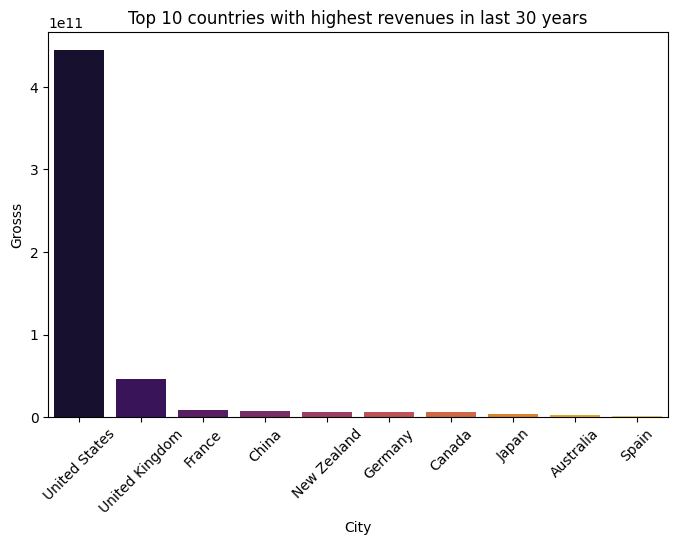

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(8, 5))

# Create the vertical barplot with y-axis labels
ax = sns.barplot(x=df_country["country"], y=df_country["gross"], palette="inferno")

# Customize the plot title and axis labels
ax.set_title('Top 10 countries with highest revenues in last 30 years')
ax.set(xlabel='City', ylabel='Grosss')

# Rotate the y-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

* It can be seen that United states has the highest revenue followed by United Kingdom which earns about 10% of total revenue if USA.
* France, China, New Zealand, Germany, Canada, Japan, Australia and Spain are still lower and negligible as compared to USA in terms of revenue earnings.
* Thus we will focus on USA as a primary country for our further analysis.

[Text(0.5, 0, 'Total Gross revenue in 100 millions'), Text(0, 0.5, 'Company')]

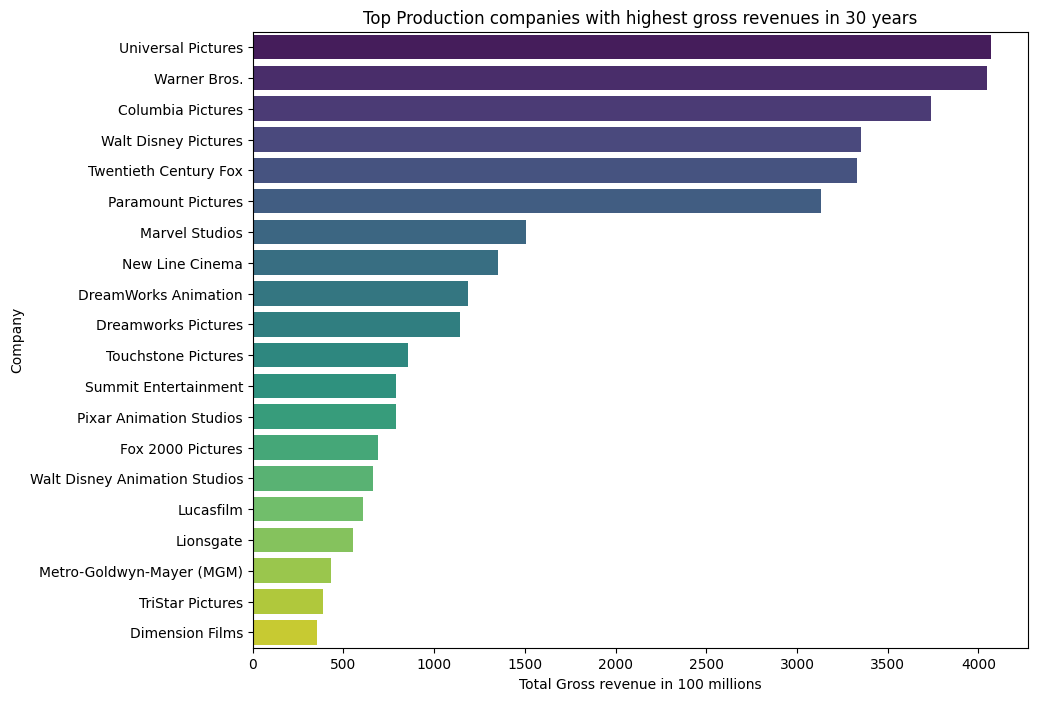

In [24]:
#Top USA states in total crimes
import matplotlib.pyplot as plt
import seaborn as sns
ax=plt.figure(figsize=(10,8))
df_company = df_company.head(20)
ax = sns.barplot(x=df_company["Gross_100mn"],y=df_company["company"], palette="viridis")
ax.set_title('Top Production companies with highest gross revenues in 30 years')
ax.set(xlabel='Total Gross revenue in 100 millions', ylabel='Company')

The graph above describes the top 20 companies with highest total gross revenues for the last 30 years.
* Universal Studios and Warner Brothers are both leading from front with total gross revenuew 4000 x 100 million dollars.
* Columbia pictures is a bit behind with revenue of about 3700 x100 million.
* Walt Diney Pcitures and 20th Century Fox have almost similar revenue of about 3300x100 million which is about 18% less than Universal studios and 11% less than Universal Studios and Warner brothers.

In [25]:
!pip install squarify

Note: Code done with the help of
 https://www.kaggle.com/code/rafffael/geting-started-movie-recommendation-with-eda-demo?scriptVersionId=89696455&cellId=25

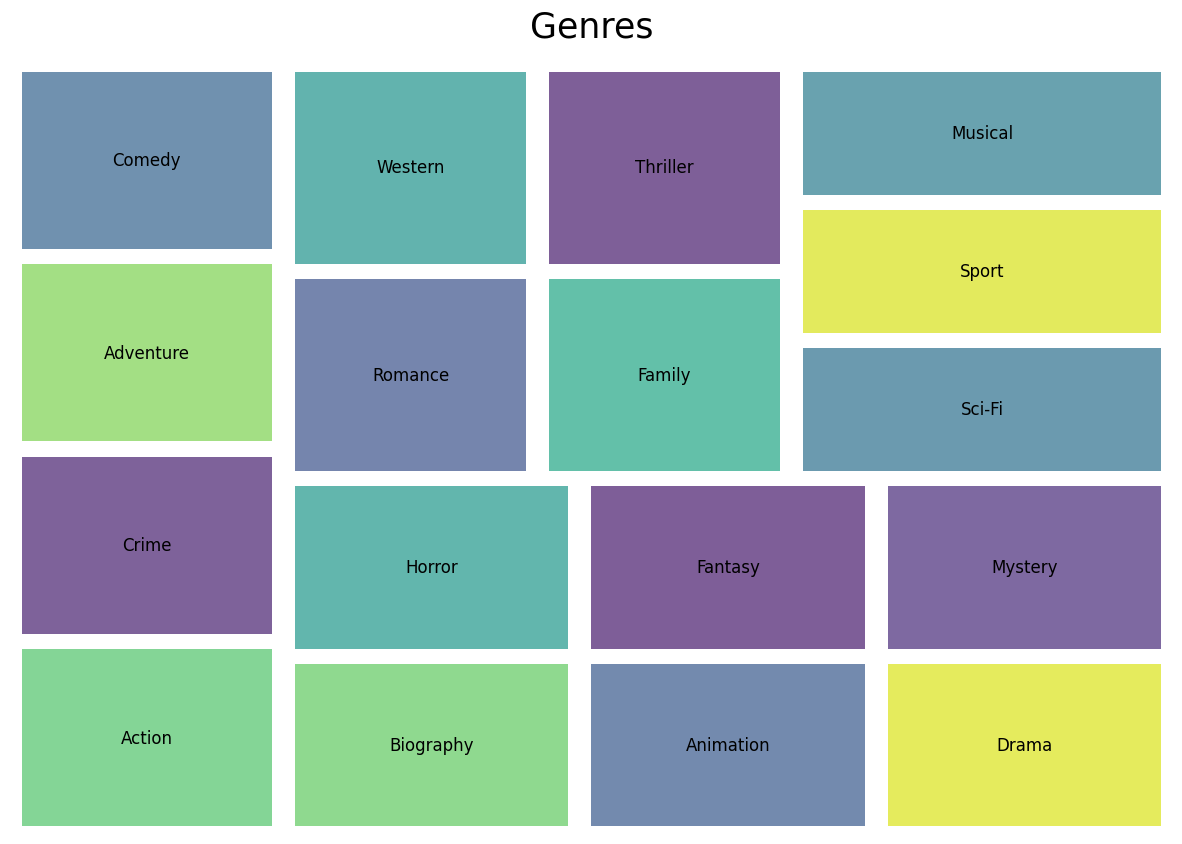

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
from collections import Counter

# Saving Genres to a list
df['genre'].unique()
genres_list = df['genre'].unique().tolist()

# Create a DataFrame using the genres_list
data = {'genre': genres_list}
df_gen = pd.DataFrame(data)

# Flatten the list of genres
genres_flatten = sum(df_gen['genre'].apply(lambda x: x.split(', ')).values, [])

# Count the frequency of each genre
genres_info = Counter(genres_flatten)

# Create the treemap
plt.figure(figsize=(15, 10))
plt.title("Genres", fontsize=25, pad=20)
squarify.plot(sizes=genres_info.values(), label=genres_info.keys(), text_kwargs={'fontsize': 12}, bar_kwargs={'alpha': 0.7}, pad=True)
plt.axis("off")
plt.show()


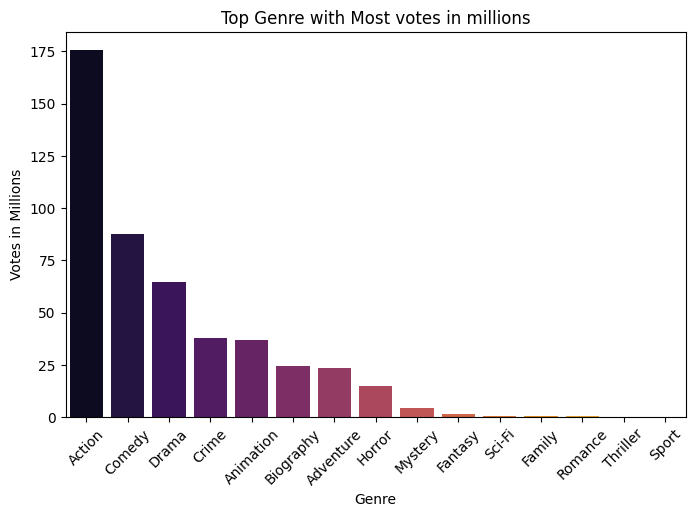

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(8, 5))

# Create the vertical barplot with y-axis labels
ax = sns.barplot(x=df_genre_vote["genre"], y=df_genre_vote["Votes_mn"], palette="inferno")

# Customize the plot title and axis labels
ax.set_title('Top Genre with Most votes in millions')
ax.set(xlabel='Genre', ylabel='Votes in Millions')

# Rotate the y-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

The plot above gives us the various genre categories across the dataframe.
As we have seen that Action genre is the most popular category followed by Comedy which is almost half in number of votes from Action. The Drama, Crime and Animation categorues are 4th highest categories followed by Biography and Adventure.

In [28]:
df_actor = df[['star','country','votes']]

df_actor = df_actor[df_actor['country'] == 'United States']
df_actor = df_actor.groupby('star')['votes'].sum().reset_index()

df_actor['Votes_mn'] = df_actor['votes']/100000

#Dropping votes column
df_actor = df_actor.drop('votes', axis=1)

df_actor = df_actor.sort_values(by='Votes_mn', ascending=False)
df_actor.head(10)

,star,Votes_mn
1366,Tom Hanks,117.370
861,Leonardo DiCaprio,113.590
1155,Robert Downey Jr.,82.461
1362,Tom Cruise,73.630
710,Johnny Depp,68.790
155,Brad Pitt,64.220
1431,Will Smith,59.060
791,Keanu Reeves,56.840
667,Jim Carrey,55.770
187,Bruce Willis,53.826


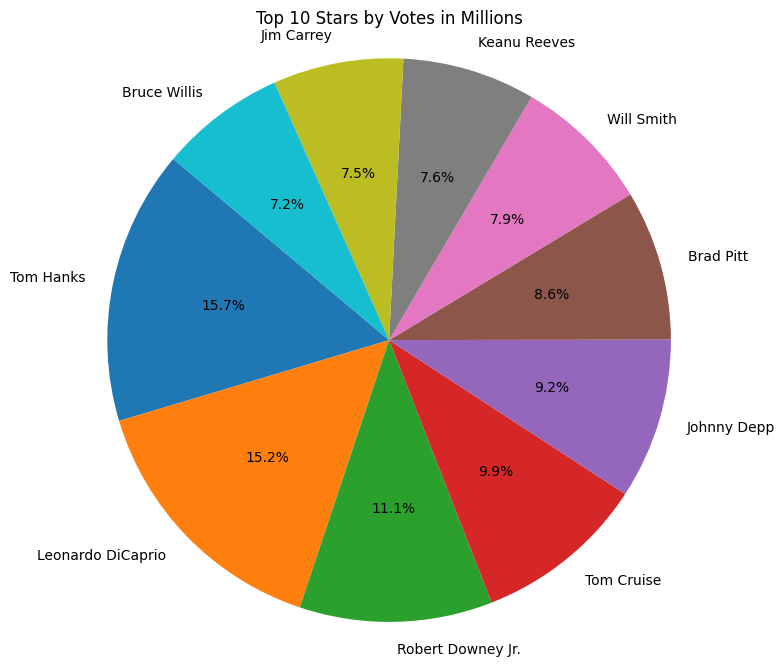

In [29]:
import matplotlib.pyplot as plt

# Select the top 10 stars with the highest votes
top_10_stars = df_actor.head(10)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_stars['Votes_mn'], labels=top_10_stars['star'], autopct='%1.1f%%', startangle=140)

# Set the title and aspect ratio
plt.axis('equal')
plt.title('Top 10 Stars by Votes in Millions')

# Display the pie chart
plt.show()


The pie chart above describes the top 10 actors in United States which have received maximum number of votes by the people. This shows their popularity which is a key driver for getting audiences to watch the films.
* The top actor with most popularity is Tom Hanks with 15.7% votes recevied from the total votes.
* Leonardo Di Caprio can also be considered as a top choice with 15.2% and a difference if just 0.5% from the top actor.
* Robert Downey Junior is considered the 3rd most popular choice with 11.1% votes which is 4% less than the top category.
* Tom Cruise and Johny Depp have a vote percentage of 9.9% and 9.2% respectively and can be considered as 3rd most favourite actors.
* Brad Pitt has around 8.6% vote to be considered as 4th most favourite actor.
* Bruce Willis, Jim Carrey, Keanu Reeves and Will Smith have similar percentage of votes of range 7.2% to 7.9% and can be considered 5th most favourite actors.

## **6) Summary**

### **Revenue Analysis:**
*	It can be seen that United states has the highest revenue followed by United Kingdom which earns about 10% of total revenue if USA.France, China, New Zealand, Germany, Canada, Japan, Australia and Spain are still lower and negligible as compared to USA in terms of revenue earnings.

### **Top Production Compnanies:**
* The top companies leading in total gross revenues were 'Universal Pictures' and 'Warner Brothers' of more than 400 x100 million dollars in last 30 years. Second most grossing companies were 'Columbia Pictures' and 'Walt Disney Pictures' with total gross revenue of 3738x100 and 3300x100 million dollars  followed by '20th Century Fox' with gross revenue of 3333x100 million dollars.

### **Ratings:**
* Out of 5 rating categoriesR(Restricted category) received the most number of votes with 206.96 million followed by PG-13(Parents strongly cautioned) which received 198.66 million votes and G(General Audiences category received the least number of votes.

### **Genre Score:**
* The Biography genre received the highest average ratings among all genres, followed by Animation, Crime, Mystery, Drama, Romance, and Sci-Fi.
Adventure, Action, and Comedy genres also received above-average ratings.


### **Genre Popularity:**
* Action Genre received most votes with 175.7mn although it did not acheived highest score followed by Comedy which received 87.465mn votes.Drama, Crime, Biography also received considerable amount of votes to be places in top 5  category

### Writer-Director Combination:
* The top writer director combination were James Cameroon and Joss Whedon  who write and direct their own movies followed by table below:

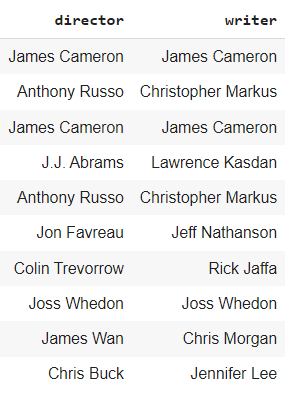

### **Popular Actors:**



* The most popular actor amongst the lot which has received the most number of votes is Tom Hanks, Lionardo Di Caprio, Robert Downey Jr followed by Bradd Pitt and Johny Depp.

## **7) Recommendation**

Based on the anlysis above we can recommend the following:

* **Target Audience Country :**  USA topped the chart in countries earning the most total gross revenues for last 30 years thus we would select as a target market for the audiences.

* **Production Company:** The companies which grossed most revenues were Universal Pictures or Warner Brothers pictures' company for producing the movie. Colombia Pictures and Walt Disney Pictures can be chosen as alternative production companies.

* **Genre:** The most profitable genre with maximum votes was 'Action' genre so we would recommend the movie theme on the basis of action genre theme. An Alternative option would be Drama, Crime and Animation genres as they received most votes after Action adn faired well in the Genre score category.

* **Director:** We would recommend 'James Cameroon' or 'Joss Whedon' as the top choice since they write and direct their movies and have given most popular and profitable movies. Alternative choice for Director would be 'Anthony Russo' or 'J.J Abrams'.

* **Writer:** We would recommend 'James Cameroon' or 'Joss Whedon' as the top choice. Alternative choice would be 'Christopher Markus' if 'Anthony Russo' is the director or Lawrence Kasdan for writer if 'Chritopher Markus' if 'J.J Abrams' is the director since their combination has given iconic movies in the past.

* **Popular Actor:** We would recommend 'Tom Hanks' or 'Leonardo Di Caprio' as the top choice for the actor. Alternative choice could be 'Robert Downey Junior' or 'Bradd Pitt' as leads.

* Limitations:
* The analysis was based on the Gross revenue of the movies and not on the actual profit hence there could be differences in top grossing companies.

* The score calculation formula is not known and hence we cannot verify the accuracy of the score.

* Votes: The votes calculation and its veracity or method of collection is not known and we assumed that the data collected was correct.